In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplotlib.patches as patches
from scipy.io import loadmat
from matplotlib.colors import ListedColormap
from matplotlib.lines import Line2D
from matplotlib.text import Text
from matplotlib.legend_handler import HandlerLine2D

In [2]:
path_np = os.path.abspath('../../../1_Simulation_Results/numpy_files/')
path_csv = os.path.abspath('../../../0_MOOSE_Input_Files/Heat_Sources/')

colormap_data = loadmat('../cold2hot.mat')
cold2hot = ListedColormap(colormap_data['colormap'])
hot2cold = ListedColormap(colormap_data['colormap'][::-1])

In [3]:
timeS_GF = np.load(path_np+'/Gaussian/Fitting/time.npy')
temp_GF = np.load(path_np+'/Gaussian/Fitting/temp.npy')
timeS_FF = np.load(path_np+'/FlatTop/Fitting/time.npy')
temp_FF = np.load(path_np+'/FlatTop/Fitting/temp.npy')
timeS_RF = np.load(path_np+'/Ring/Fitting/time.npy')
temp_RF = np.load(path_np+'/Ring/Fitting/temp.npy')
timeS_BT = np.load(path_np+'/Bessel/TDB/time.npy')
temp_BT = np.load(path_np+'/Bessel/TDB/temp.npy')

In [4]:
G_Tdb = pd.read_csv(path_csv+'/Gaussian/TDB/exodus/Au-Au.csv',     encoding='utf-8')
G_Fit = pd.read_csv(path_csv+'/Gaussian/Fitting/exodus/Au-Au.csv', encoding='utf-8')
F_Tdb = pd.read_csv(path_csv+'/FlatTop/TDB/exodus/Au-Au.csv',      encoding='utf-8')
R_Tdb = pd.read_csv(path_csv+'/Ring/TDB/exodus/Au-Au.csv',         encoding='utf-8')

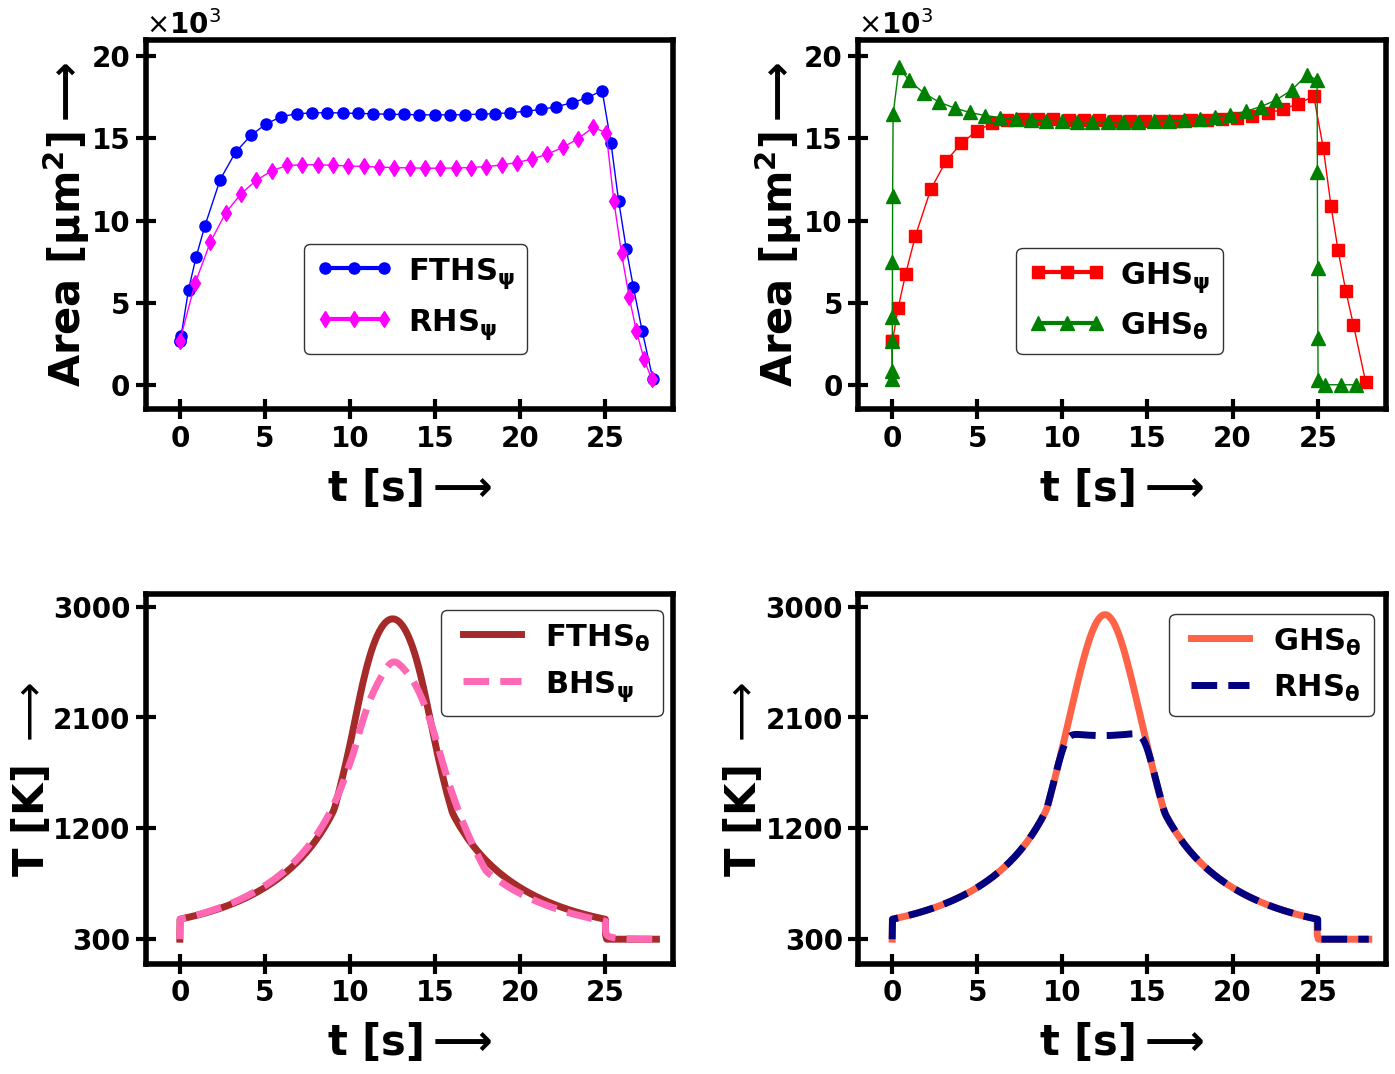

In [6]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=[16, 12], frameon=False)
ax1.set_facecolor((0, 0, 0, 0))
ax2.set_facecolor((0, 0, 0, 0))
ax3.set_facecolor((0, 0, 0, 0))
ax4.set_facecolor((0, 0, 0, 0))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.35, hspace=0.5)

x = int((401/1000)*500) # x-coordinate of point of interest
y = 0 # y coordinate of point of interest ## origin is at top left corner

FT, = ax1.plot(F_Tdb['time'].iloc[::15], F_Tdb['area_h1'].iloc[::15], linewidth=1, linestyle='-', marker='o', markersize=8, color = 'blue', label =r'FTHS$\mathbf{_{\psi}}$')
RT, = ax1.plot(R_Tdb['time'].iloc[::15], R_Tdb['area_h1'].iloc[::15], linewidth=1, linestyle='-', marker='d', markersize=8, color = 'magenta', label =r'RHS$\mathbf{_{\psi}}$')
ax1.set_ylabel(r"Area $ \mathbf{ [\mu m^2] \longrightarrow}$", loc='center',  weight = 'bold', labelpad=0, size=30, color='k')
ax1.set_xlabel(r"t [s]$ \mathbf{\longrightarrow}$", loc='center',  weight = 'bold', labelpad=10, size=30, color='k')
ax1.set_xticks([0, 5, 10, 15, 20, 25], labels=['0', '5', '10', '15', '20', '25'], size=20, weight='bold', color='k')
ax1.set_yticks([0, 5_000, 10_000, 15_000, 20_000, 25_000], labels=['0', '5', '10', '15', '20', '25'], size=20, color='k', weight='bold')
ax1.set_title(r'$\times$10$^3$', pad=0, loc='left', color='k', fontsize=20, weight='bold')
# ax1.set_title("Flat-Top HS", fontsize=30, weight='bold', pad=10)
ax1.set_ylim(-1500, 21000)
ax1.set_xlim(-2, 29)
ax1.spines[:].set_linewidth(4)
ax1.tick_params(axis='both', which='both', direction='inout', length=15, width=3, color='k')
legend_FR = ax1.legend(loc=(0.30, 0.15), ncol=1,  columnspacing=1.0, prop={'weight':'bold', 'size':'22',}, handler_map={FT: HandlerLine2D(numpoints=3), RT: HandlerLine2D(numpoints=3)}, handletextpad=0.5, handlelength=2.5, handleheight=1, edgecolor="black", facecolor='None', frameon=True)
[line.set_linewidth(3.0) for line in legend_FR.get_lines()]

GT, = ax2.plot(G_Tdb['time'].iloc[::15], G_Tdb['area_h1'].iloc[::15], linewidth=1, linestyle='-', mec='red', mfc='red', color = 'red',  marker='s', markersize=8, label =r'GHS$\mathbf{_{\psi}}$')
GF, = ax2.plot(G_Fit['time'].iloc[::15], G_Fit['area_h1'].iloc[::15], linewidth=1, linestyle='-', color='green',  marker='^', markersize=10, label=r'GHS$\mathbf{_{\theta}}$')
ax2.set_ylabel(r"Area $ \mathbf{ [\mu m^2] \longrightarrow}$", loc='center',  weight = 'bold', labelpad=0, size=30, color='k')
ax2.set_xlabel(r"t [s]$ \mathbf{\longrightarrow}$", loc='center',  weight = 'bold', labelpad=10, size=30, color='k')
ax2.set_xticks([0, 5, 10, 15, 20, 25], labels=['0', '5', '10', '15', '20', '25'], size=20, weight='bold', color='k')
ax2.set_yticks([0, 5_000, 10_000, 15_000, 20_000, 25_000], labels=['0', '5', '10', '15', '20', '25'], size=20, color='k', weight='bold')
ax2.set_title(r'$\times$10$^3$', pad=0, loc='left', color='k', fontsize=20, weight='bold')
# ax2.set_title("Gaussian HS", fontsize=30, weight='bold', pad=10)
ax2.set_ylim(-1500, 21000)
ax2.set_xlim(-2, 29)
ax2.spines[:].set_linewidth(4)
ax2.tick_params(axis='both', which='both', direction='inout', length=15, width=3, color='k')
legend_G = ax2.legend(loc=(0.30, 0.15), ncol=1,  columnspacing=1.0, prop={'weight':'bold', 'size':'22',}, handler_map={GT: HandlerLine2D(numpoints=3), GF: HandlerLine2D(numpoints=3)}, handletextpad=0.5, handlelength=2.5, handleheight=1, edgecolor="black", facecolor='None', frameon=True)
[line.set_linewidth(3.0) for line in legend_G.get_lines()]


FF, = ax3.plot(timeS_FF, temp_FF[0,200,:], linewidth=5, linestyle='-',  color = 'brown', label =r'FTHS$\mathbf{_{\theta}}$')
BT, = ax3.plot(timeS_BT, temp_BT[0,200,:], linewidth=5, linestyle='--',  color='hotpink', label=r'BHS$\mathbf{_{\psi}}$')
ax3.set_ylabel(r"T [K] $\longrightarrow$", loc='center',  weight = 'bold', labelpad=0, size=30, color='k')
ax3.set_xlabel(r"t [s]$ \mathbf{\longrightarrow}$", loc='center',  weight = 'bold', labelpad=10, size=30, color='k')
ax3.set_xticks([0, 5, 10, 15, 20, 25], labels=['0', '5', '10', '15', '20', '25'], size=20, weight='bold', color='k')
ax3.set_yticks([300, 1_200, 2_100, 3_000], labels=['300', '1200', '2100', '3000'], size=20, color='k', weight='bold')
ax3.set_ylim(100, 3100)
ax3.set_xlim(-2, 29)
ax3.spines[:].set_linewidth(4)
ax3.tick_params(axis='both', which='both', direction='inout', length=15, width=3, color='k')
legend_FB = ax3.legend(loc=(0.56, 0.67), ncol=1,  columnspacing=1.0, prop={'weight':'bold', 'size':'22',}, handler_map={FF: HandlerLine2D(numpoints=3), BT: HandlerLine2D(numpoints=3)}, handletextpad=0.5, handlelength=2.5, handleheight=1, edgecolor="black", facecolor='None', frameon=True)
[line.set_linewidth(5) for line in legend_FB.get_lines()]


GF, = ax4.plot(timeS_GF, temp_GF[0,x,:], linewidth=5, linestyle='-',  color = 'tomato', label =r'GHS$\mathbf{_{\theta}}$')
RF, = ax4.plot(timeS_RF, temp_RF[0,x,:], linewidth=5, linestyle='--',  color='navy', label=r'RHS$\mathbf{_{\theta}}$')
ax4.set_ylabel(r"T [K] $\longrightarrow$", loc='center',  weight = 'bold', labelpad=0, size=30, color='k')
ax4.set_xlabel(r"t [s]$ \mathbf{\longrightarrow}$", loc='center',  weight = 'bold', labelpad=10, size=30, color='k')
ax4.set_xticks([0, 5, 10, 15, 20, 25], labels=['0', '5', '10', '15', '20', '25'], size=20, weight='bold', color='k')
ax4.set_yticks([300, 1_200, 2_100, 3_000], labels=['300', '1200', '2100', '3000'], size=20, color='k', weight='bold')
ax4.set_ylim(100, 3100)
ax4.set_xlim(-2, 29)
ax4.spines[:].set_linewidth(4)
ax4.tick_params(axis='both', which='both', direction='inout', length=15, width=3, color='k')
legend_GR = ax4.legend(loc=(0.59, 0.67), ncol=1,  columnspacing=1.0, prop={'weight':'bold', 'size':'22',}, handler_map={GF: HandlerLine2D(numpoints=3), RF: HandlerLine2D(numpoints=3)}, handletextpad=0.5, handlelength=2.5, handleheight=1, edgecolor="black", facecolor='None', frameon=True)
[line.set_linewidth(5) for line in legend_GR.get_lines()]

# plt.savefig('../../figures/Area_Tt.png',bbox_inches='tight', dpi=800)
# plt.savefig('../../figures/jpg/Area_Tt.jpg',bbox_inches='tight',)

plt.show()